In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pastel_colors = sns.color_palette("pastel")  # Get 2 pastel colors for the bars

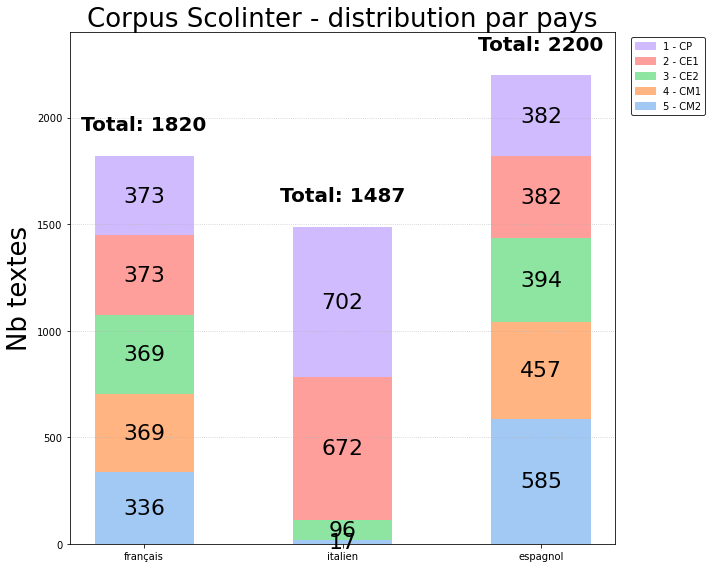

In [4]:
# Données
pays = ['français', 'italien', 'espagnol']
cm2 = [336, 17, 585]
cm1 = [369, 0, 457]
ce2 = [369, 96, 394]
ce1 = [373, 672, 382]
cp = [373, 702, 382]

# Palette pastel de Seaborn
colors = sns.color_palette("pastel")
color_list = colors[:5]

# Inverser les niveaux pour empiler de bas en haut (CM2 -> CP)
levels = [cm2, cm1, ce2, ce1, cp]
labels = ['5 - CM2', '4 - CM1', '3 - CE2', '2 - CE1', '1 - CP']
legend_labels = list(reversed(labels))  # pour afficher dans l’ordre 1 → 5
legend_colors = list(reversed(color_list))

# Figure plus large
fig, ax = plt.subplots(figsize=(10, 8))

# Empilement
bottom_vals = np.zeros(len(pays))
bars = []
for i, values in enumerate(levels):
    bar = ax.bar(pays, values, bottom=bottom_vals, color=color_list[i], label=labels[i], width=0.5)
    bars.append(bar)
    bottom_vals += values
# Ajouter les totaux en haut de chaque colonne
for i, total in enumerate(bottom_vals):
    ax.text(i, total + 100, f'Total: {int(total)}', ha='center', va='bottom', fontsize=20, fontweight='bold')

# Étiquettes internes
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2.,
                    f'{int(height)}', ha='center', va='center', fontsize=22)

for b in bars:
    add_labels(b)

# Paramètres du graphique
ax.set_title('Corpus Scolinter - distribution par pays', fontsize=26)
ax.set_ylabel('Nb textes', fontsize=26)
ax.set_ylim(0, 2400)  # Invece di 2500
ax.set_yticks(np.arange(0, 2001, 500))  # Aggiornamento corrispondente
ax.grid(axis='y', linestyle=':', alpha=0.7)

# Légende manuelle (dans l’ordre 1 - 5)
from matplotlib.patches import Patch
legend_patches = [Patch(color=c, label=l) for c, l in zip(legend_colors, legend_labels)]
legend = ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

plt.tight_layout()
plt.show()

Plot per len moy niveau en tokens ITALIANO

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/4068982548.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/4068982548.py:28: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)


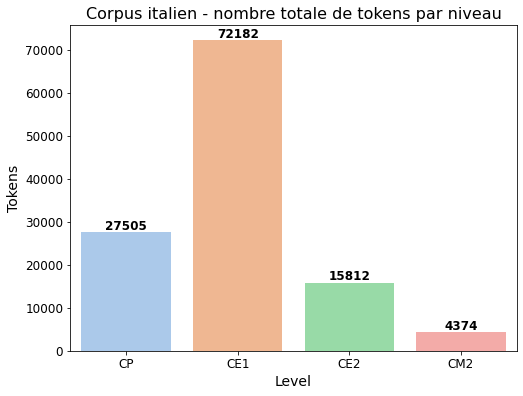

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/4068982548.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/4068982548.py:50: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)


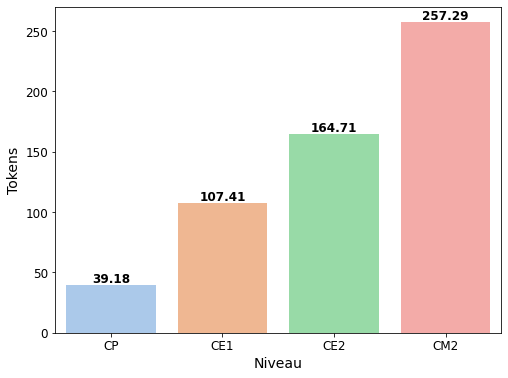

,level,toks
0,CE1,107.413690
1,CE2,164.708333
2,CM2,257.294118
3,CP,39.180912


In [3]:
file = "./caracterisation_corpus_longit/pre-processing_italian/corpus_ita_predicted_2025_toks.csv"

cols = ["text", "level", "toks"]
df = pd.read_csv(file, names = cols, header=None, sep=",")

# Mapping dictionary
level_mapping = {1: 'CP', 2: 'CE1', 3: 'CE2', 4: 'CM1', 5: 'CM2', 6: 'Sixième'}

# Replace values in 'level' column
df['level'] = df['level'].replace(level_mapping)

#tot tokens par niveau
tot_tokens = df.groupby('level').sum().reset_index()
tot_tokens_tt = df.groupby('level').sum().reset_index().sum()

#moyenne tokens par niveau
moyenne = df.groupby('level').mean().reset_index()
moy_tot = df['toks'].mean()

levels = ['CP', 'CE1', 'CE2', 'CM2']

txt_par_niveau = df['level'].value_counts()
sum_txt_par_niveau = df['level'].value_counts().sum()

###bar plot nb tot tokens
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labeling the plot
plt.xlabel("Level", fontsize=14)
plt.ylabel("Tokens", fontsize=14)
plt.title("Corpus italien - nombre totale de tokens par niveau", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


###bar plot moyenne nb tokens
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),2)}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labeling the plot
plt.xlabel("Niveau", fontsize=14)
plt.ylabel("Tokens", fontsize=14)
#plt.title("Corpus italien - moyenne du nombre de tokens par texte par niveau", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


moy_tokens_ita = moyenne
moy_tokens_ita.head()

Plot per len moy niveau en tokens FRANCESE

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/595565208.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/595565208.py:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)


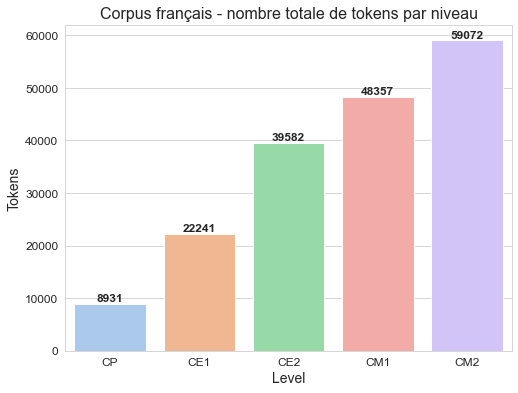

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/595565208.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/595565208.py:40: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)


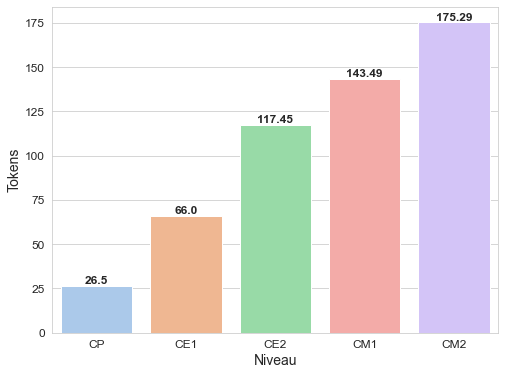

105.746587537092


In [11]:
file = "./caracterisation_corpus_longit/pre-processing_french/corpus_french_predicted_2025_toks.csv"

cols = ["text", "level", "toks"]
df = pd.read_csv(file, names = cols, header=None, sep=",")

#tot tokens par niveau
tot_tokens = df.groupby('level').sum().reset_index()

#moyenne tokens par niveau
moyenne = df.groupby('level').mean().reset_index()
moy_tot = df['toks'].mean()

levels = ['CP', 'CE1', 'CE2', 'CM1', 'CM2']

###bar plot nb tot tokens
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="level", y="toks", data=tot_tokens, order = levels, palette=pastel_colors)

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labeling the plot
plt.xlabel("Level", fontsize=14)
plt.ylabel("Tokens", fontsize=14)
plt.title("Corpus français - nombre totale de tokens par niveau", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


###bar plot moyenne nb tokens
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="level", y="toks", data=moyenne, order = levels, palette=pastel_colors)

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),2)}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labeling the plot
plt.xlabel("Niveau", fontsize=14)
plt.ylabel("Tokens", fontsize=14)
#plt.title("Corpus français - moyenne du nombre de tokens par texte par niveau", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

moy_tokens_fr = moyenne
moy_tokens_fr.head()
print(moy_tokens_fr['toks'].mean())

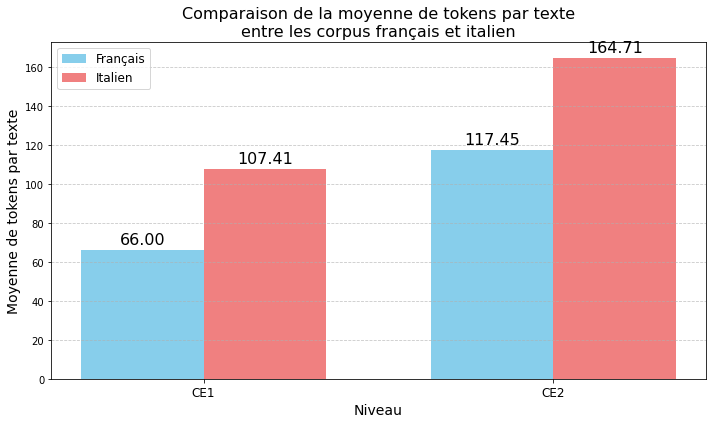

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données italiennes
file_italian = "./caracterisation_corpus_longit/pre-processing_italian/corpus_ita_predicted_2025_toks.csv"
cols = ["text", "level", "toks"]
df_italian = pd.read_csv(file_italian, names=cols, header=None, sep=",")

# Charger les données françaises
file_french = "./caracterisation_corpus_longit/pre-processing_french/corpus_french_predicted_2025_toks.csv"
df_french = pd.read_csv(file_french, names=cols, header=None, sep=",")

# Mapping dictionary
level_mapping = {1: 'CP', 2: 'CE1', 3: 'CE2', 4: 'CM1', 5: 'CM2', 6: 'Sixième'}

# Remplacer les valeurs dans la colonne 'level'
df_italian['level'] = df_italian['level'].replace(level_mapping)
df_french['level'] = df_french['level'].replace(level_mapping)

# Calculer la moyenne de tokens par niveau pour chaque corpus
moyenne_italian = df_italian.groupby('level')['toks'].mean().reset_index()
moyenne_french = df_french.groupby('level')['toks'].mean().reset_index()

# Filtrer uniquement CE1 et CE2
ce_italian = moyenne_italian[moyenne_italian['level'].isin(['CE1', 'CE2'])]
ce_french = moyenne_french[moyenne_french['level'].isin(['CE1', 'CE2'])]

# Créer un dictionnaire pour faciliter l'accès aux données
data = {
    'CE1': {'Italien': ce_italian[ce_italian['level'] == 'CE1']['toks'].values[0] if not ce_italian[ce_italian['level'] == 'CE1'].empty else 0,
            'Français': ce_french[ce_french['level'] == 'CE1']['toks'].values[0] if not ce_french[ce_french['level'] == 'CE1'].empty else 0},
    'CE2': {'Italien': ce_italian[ce_italian['level'] == 'CE2']['toks'].values[0] if not ce_italian[ce_italian['level'] == 'CE2'].empty else 0,
            'Français': ce_french[ce_french['level'] == 'CE2']['toks'].values[0] if not ce_french[ce_french['level'] == 'CE2'].empty else 0}
}

# Configurer le graphique
labels = ['CE1', 'CE2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres
rects1 = ax.bar(x - width/2, [data['CE1']['Français'], data['CE2']['Français']], width, label='Français', color='skyblue')
rects2 = ax.bar(x + width/2, [data['CE1']['Italien'], data['CE2']['Italien']], width, label='Italien', color='lightcoral')

# Ajouter les valeurs sur les barres
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16)

add_labels(rects1)
add_labels(rects2)

# Personnaliser le graphique
ax.set_xlabel('Niveau', fontsize=14)
ax.set_ylabel('Moyenne de tokens par texte', fontsize=14)
ax.set_title('Comparaison de la moyenne de tokens par texte\nentre les corpus français et italien', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


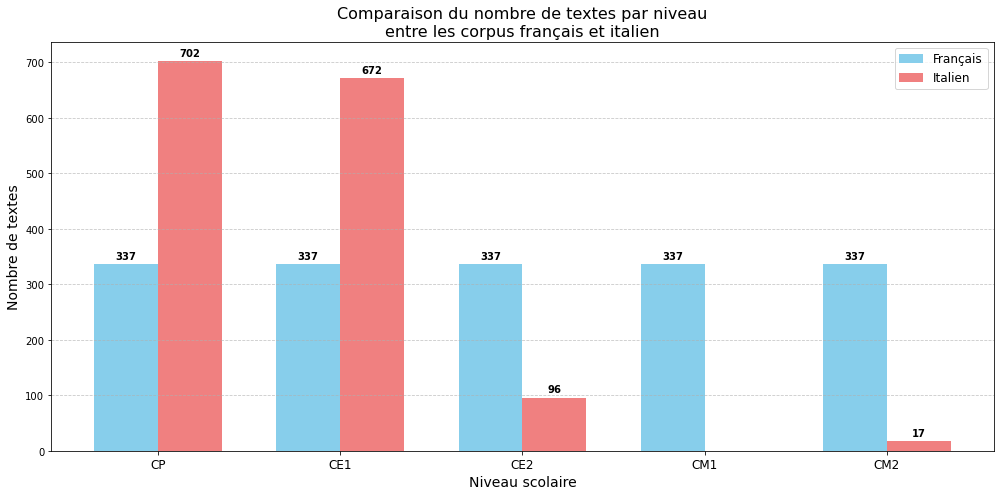

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données italiennes
file_italian = "./caracterisation_corpus_longit/pre-processing_italian/corpus_ita_predicted_2025_toks.csv"
cols = ["text", "level", "toks"]
df_italian = pd.read_csv(file_italian, names=cols, header=None, sep=",")

# Charger les données françaises
file_french = "./caracterisation_corpus_longit/pre-processing_french/corpus_french_predicted_2025_toks.csv"
df_french = pd.read_csv(file_french, names=cols, header=None, sep=",")

# Mapping dictionary
level_mapping = {1: 'CP', 2: 'CE1', 3: 'CE2', 4: 'CM1', 5: 'CM2', 6: 'Sixième'}

# Remplacer les valeurs dans la colonne 'level'
df_italian['level'] = df_italian['level'].replace(level_mapping)
df_french['level'] = df_french['level'].replace(level_mapping)

# Compter le nombre de textes par niveau pour chaque corpus
count_italian = df_italian['level'].value_counts().reset_index()
count_italian.columns = ['level', 'count']
count_italian = count_italian.sort_values('level')

count_french = df_french['level'].value_counts().reset_index()
count_french.columns = ['level', 'count']
count_french = count_french.sort_values('level')

# Définir les niveaux à afficher, en incluant CM1
levels = ['CP', 'CE1', 'CE2', 'CM1', 'CM2']

# Créer un dictionnaire pour faciliter l'accès aux données
data = {}
for level in levels:
    italian_count = count_italian[count_italian['level'] == level]['count'].values[0] if level in count_italian['level'].values else 0
    french_count = count_french[count_french['level'] == level]['count'].values[0] if level in count_french['level'].values else 0
    
    data[level] = {
        'Italien': italian_count,
        'Français': french_count
    }

# Configurer le graphique
x = np.arange(len(levels))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

# Créer les barres
french_counts = [data[level]['Français'] for level in levels]
italian_counts = [data[level]['Italien'] for level in levels]

rects1 = ax.bar(x - width/2, french_counts, width, label='Français', color='skyblue')
rects2 = ax.bar(x + width/2, italian_counts, width, label='Italien', color='lightcoral')

# Ajouter les valeurs sur les barres
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:  # Seulement afficher l'étiquette si la hauteur est supérieure à 0
            ax.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold')

add_labels(rects1)
add_labels(rects2)

# Personnaliser le graphique
ax.set_xlabel('Niveau scolaire', fontsize=14)
ax.set_ylabel('Nombre de textes', fontsize=14)
ax.set_title('Comparaison du nombre de textes par niveau\nentre les corpus français et italien', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(levels, fontsize=12)
ax.legend(fontsize=12)

# Afficher une ligne horizontale à y=0
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Afficher le graphique
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



comparaison toks fr et ita

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21104/3047367889.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='level', y='Value', data=melted_df,


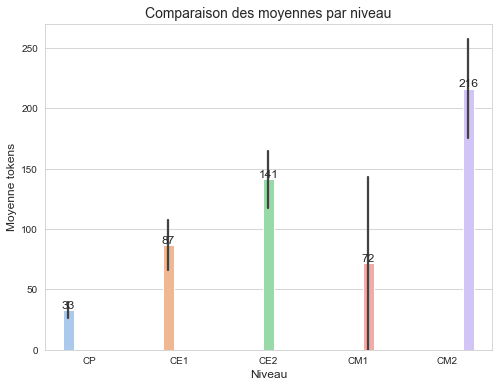

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define levels
levels = ['CP', 'CE1', 'CE2', 'CM1', 'CM2']

# Merge DataFrames and clean up
merged_df = pd.merge(moy_tokens_fr, moy_tokens_ita, on='level', how='outer')
merged_df = merged_df.rename(columns={'toks_x': 'français', 'toks_y': 'italien'})

# Fill NaN values with 0
merged_df = merged_df.fillna(0)

# Ensure 'level' is categorical and sorted
merged_df['level'] = pd.Categorical(merged_df['level'], categories=levels, ordered=True)
merged_df = merged_df.sort_values('level')

# Reshape DataFrame for plotting
melted_df = merged_df.melt(id_vars=['level'], var_name='Dataset', value_name='Value')

# Plot bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create the bar plot
ax = sns.barplot(x='level', y='Value', data=melted_df, 
                 palette='pastel', dodge=True, width=0.6)

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f"{height:.0f}", 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel("Niveau", fontsize=12)
plt.ylabel("Moyenne tokens", fontsize=12)
plt.title("Comparaison des moyennes par niveau", fontsize=14)

# Show the plot
plt.show()

Merged DataFrame before melting:
  level          fr          it
4    CP   26.501484   39.180912
0   CE1   65.997033  107.413690
1   CE2  117.454006  164.708333
2   CM1  143.492582    0.000000
3   CM2  175.287834  257.294118

Melted DataFrame:
  level Dataset       Value
0    CP      fr   26.501484
1   CE1      fr   65.997033
2   CE2      fr  117.454006
3   CM1      fr  143.492582
4   CM2      fr  175.287834
5    CP      it   39.180912
6   CE1      it  107.413690
7   CE2      it  164.708333
8   CM1      it    0.000000
9   CM2      it  257.294118


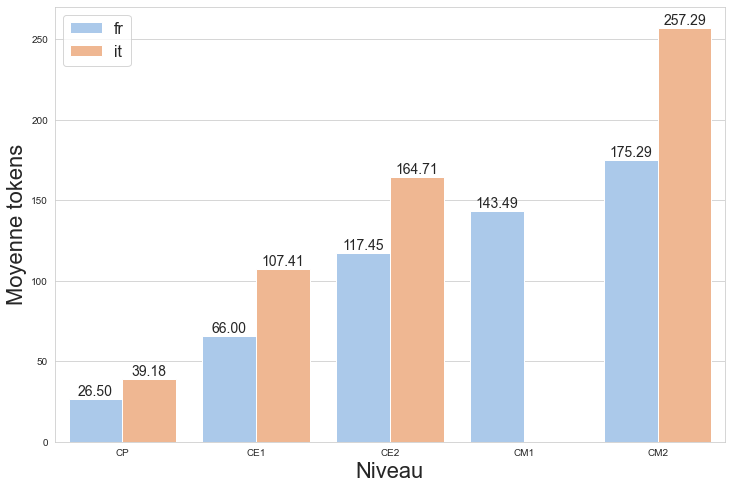

In [16]:
# Define levels
levels = ['CP', 'CE1', 'CE2', 'CM1', 'CM2']

# Merge DataFrames and rename columns
merged_df = pd.merge(moy_tokens_fr, moy_tokens_ita, on='level', how='outer').rename(
    columns={'toks_x': 'fr', 'toks_y': 'it'}
)

# Fill missing values with 0
merged_df = merged_df.fillna(0)

# Ensure 'level' follows a specific order
merged_df['level'] = pd.Categorical(merged_df['level'], categories=levels, ordered=True)

# Sort based on 'level'
merged_df = merged_df.sort_values('level')

# **Check the Data Before Melting**
print("Merged DataFrame before melting:")
print(merged_df)

# **Melt the DataFrame**
melted_df = merged_df.melt(id_vars=['level'], var_name='Dataset', value_name='Value')

# **Check the Melted DataFrame**
print("\nMelted DataFrame:")
print(melted_df)

# Plot settings
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create the grouped bar plot with pastel colors
ax = sns.barplot(x='level', y='Value', hue='Dataset', data=melted_df, 
                 palette='pastel', dodge=True, width=0.8,)

# Add value labels above each bar
for p in ax.patches:
    if p.get_height() > 0:  # Avoid placing labels on zero bars
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=14)

# Set labels and title
plt.xlabel("Niveau", fontsize=22)
plt.ylabel("Moyenne tokens", fontsize=22)
plt.title("")

# Modify the legend to remove the title
ax.legend(title='', loc='best', fontsize=16)  # Remove the legend title

# Save the plot as PNG with the highest quality (300 dpi)
plt.savefig('./compare_moy_tokens.png', dpi=1200, bbox_inches='tight')
# Show the plot
plt.show()


Codice per creare plot comparazione tra typologie des mentions en français et italien -- prende in entrata Excel dove ogni foglio contiene i dettagli di ogni menzione, ogni foglio rappresenta un tipo di menzione (vedere mention details format)

L'appartenenza delle menzioni alle diverse categorie è stata corretta manualmente nei due casi, i fogli in entrata sono stati revisionati e corretti a mano 

            Type    Nb
0  Anaphore Zéro   126
1          Autre    30
2     Nom Propre   109
3         Pronom  1237
4      SN défini   804


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11868/2047116824.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Type'] = pd.Categorical(df_plot['Type'], categories=categories, ordered=True)


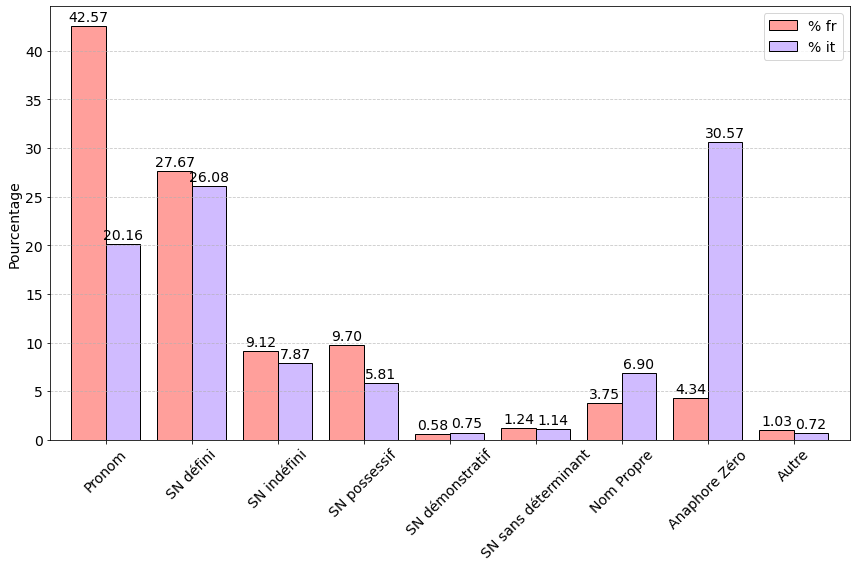

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 25 15:40:23 2025

@author: matil

check doubles
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define a mapping of sheet names to group names
sheet_groups = {
    "sn_def": "SN défini",
    "sn_indef": "SN indéfini",
    "verb": "Anaphore Zéro",
    "pron": "Pronom",
    "propn": "Nom Propre", 
    "det_poss": "SN possessif", 
    "sn_poss": "SN possessif",
    "sn_dem" : "SN démonstratif",
    "sn_no_det" : "SN sans déterminant",
    "numerals" : "Autre",
    "autre" : 'Autre'

}


def calculate_ERType(file_path, sheet_groups) :
    xls = pd.ExcelFile(file_path)
    
    # Dictionary to store dataframes
    dfs = {}
    
    # Read each sheet into a dataframe
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        # Ensure 'Index' column exists
        if 'Unnamed: 0' in df.columns:
            dfs[sheet_name] = df  # Store dataframe
    
    total_rows = sum(len(df.dropna(how="all")) for df in dfs.values())
    #print(f"Total number of non-empty rows across all sheets: {total_rows}")
    
    
    # Create a list to store sheet names, groups, and row counts
    sheet_info = []
    
    # Iterate through each sheet
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        
        # Drop completely empty rows
        df = df.dropna(how="all")
        
        # Count rows excluding the header
        row_count = len(df)
        
        # Determine the group (default to "Uncategorized" if not found in mapping)
        group_name = sheet_groups.get(sheet_name, "Uncategorized")
        
        # Append sheet name, group, and row count to the list
        sheet_info.append({"Sheet Name": sheet_name, "Type": group_name, "Nb": row_count})
    
    # Convert to DataFrame
    sheet_info_df = pd.DataFrame(sheet_info)
    
    # Display the DataFrame
    #print(sheet_info_df)
    
    # Convert to DataFrame
    sheet_info_df = pd.DataFrame(sheet_info)
    
    # Now, group by 'Group' and sum the 'Row Count'
    grouped_df = sheet_info_df.groupby("Type")["Nb"].sum().reset_index()
    
    # Display the grouped DataFrame
    #print(grouped_df)
    return grouped_df, dfs


# Load the Excel file
file_path_fr = "typologie_mentions_fr_V3_DEF.xlsx"
file_path_it = "ita_types_v2.xlsx"

french, fr_dfs = calculate_ERType(file_path_fr, sheet_groups)
italian, it_dfs = calculate_ERType(file_path_it, sheet_groups)

#####filter out singletons and anaphoras##############################################################################
filtered_df_fr = pd.read_csv('./anaphores_fr.csv') #<- fatto con interdistance_table
filtered_df_it = pd.read_csv('./anaphores_it.csv') #<- fatto con interdistance_table


def filter_anaphoras(dfs_dict, filtered_df) : #dico de df, df anaphores
    
    # Define the columns to compare
    comparison_columns = ['begin', 'end', 'mention', 'tag', 'tag_occurrences', 'Source']
    
    # Ensure filtered_df only contains relevant columns
    filtered_df_selected = filtered_df[comparison_columns].copy()
    
    # Convert data types in filtered_df_selected
    for col in comparison_columns:
        if col in filtered_df_selected.columns:
            if filtered_df_selected[col].dtype == 'object':
                filtered_df_selected[col] = filtered_df_selected[col].astype(str).str.strip()
            else:
                filtered_df_selected[col] = pd.to_numeric(filtered_df_selected[col], errors='coerce')
    
    # Iterate over each DataFrame in the dictionary and drop matching rows
    for key in dfs_dict:
        existing_columns = [col for col in comparison_columns if col in dfs_dict[key].columns]
        
        # Convert data types in dfs_dict[key] to match filtered_df_selected
        for col in existing_columns:
            if dfs_dict[key][col].dtype == 'object':
                dfs_dict[key][col] = dfs_dict[key][col].astype(str).str.strip()
            else:
                dfs_dict[key][col] = pd.to_numeric(dfs_dict[key][col], errors='coerce')
    
        # Merge and filter
        dfs_dict[key] = dfs_dict[key].merge(filtered_df_selected[existing_columns], on=existing_columns, how='left', indicator=True)
        dfs_dict[key] = dfs_dict[key][dfs_dict[key]['_merge'] == 'left_only'].drop(columns=['_merge'])
    
    return dfs_dict

######
filtered_fr = filter_anaphoras(fr_dfs, filtered_df_fr)
filtered_ita = filter_anaphoras(it_dfs, filtered_df_it)

# Define the new function to work with a dictionary of DataFrames
def calculate_ERType_from_dict(dfs_dict, sheet_groups):
    # Dictionary to store the information about rows for each dataframe
    sheet_info = []
    
    # Total number of non-empty rows across all dataframes
    total_rows = sum(len(df.dropna(how="all")) for df in dfs_dict.values())
    #print(f"Total number of non-empty rows across all dataframes: {total_rows}")
    
    # Iterate through each dataframe in the dictionary
    for sheet_name, df in dfs_dict.items():
        # Drop completely empty rows
        df_cleaned = df.dropna(how="all")
        
        # Count rows excluding the header
        row_count = len(df_cleaned)
        
        # Determine the group (default to "Uncategorized" if not found in mapping)
        group_name = sheet_groups.get(sheet_name, "Uncategorized")
        
        # Append dataframe (sheet_name), group, and row count to the list
        sheet_info.append({"Sheet Name": sheet_name, "Type": group_name, "Nb": row_count})
    
    # Convert the sheet_info list to a DataFrame
    sheet_info_df = pd.DataFrame(sheet_info)
    
    # Display the DataFrame
    #print(sheet_info_df)
    
    # Now, group by 'Type' (group name) and sum the 'Nb' (row count)
    grouped_df = sheet_info_df.groupby("Type")["Nb"].sum().reset_index()
    
    # Display the grouped DataFrame
    #print(grouped_df)
    
    return grouped_df


# Call the modified function
french = calculate_ERType_from_dict(filtered_fr, sheet_groups)
italian = calculate_ERType_from_dict(filtered_ita, sheet_groups)

print(french.head())
#######################################
#plot similarities and differences between the two languages in terms of distribution : percentage representation
merged_df = pd.merge(french, italian, on='Type', suffixes=('_fr', '_it'))

# Step 2: Calculate the percentage for each column
merged_df['% fr'] = merged_df['Nb_fr'] / merged_df['Nb_fr'].sum() * 100
merged_df['% it'] = merged_df['Nb_it'] / merged_df['Nb_it'].sum() * 100

# Step 1: Add a row with the sum of each column
sum_row = merged_df[['Nb_fr', 'Nb_it']].sum()
sum_row['Type'] = 'Total'  # Add the 'Total' label for the Category
merged_df = merged_df.append(sum_row, ignore_index=True)

# # Plotting the merged DataFrame
# merged_df.plot(x='Type', y=['% fr', '% it'], kind='bar')
# plt.title('Comparison of Values by Category')
# plt.ylabel('Values')
# plt.show()
# Use Seaborn pastel color palette
pastel_colors = sns.color_palette("pastel")  # Get 2 pastel colors for the bars
pastel_colors = pastel_colors[3:5]

#fixed categories for x axis label order
categories = ["Pronom", "SN défini", "SN indéfini","SN possessif", "SN démonstratif", "SN sans déterminant",
              "Nom Propre", "Anaphore Zéro", "Autre"]

# Assuming 'merged_df' is your DataFrame and contains the columns '% fr' and '% it'
# Exclude the "Total" row
df_plot = merged_df[merged_df['Type'] != 'Total']

df_plot['Type'] = pd.Categorical(df_plot['Type'], categories=categories, ordered=True)

# Sort the dataframe to match the category order
df_plot = df_plot.sort_values('Type')

# Create the bar plot with custom width and spacing between groups
ax = df_plot.plot(x='Type', y=['% fr', '% it'], kind='bar', width=0.8, figsize=(12, 8), 
                  color=pastel_colors, edgecolor='black')

# Add grid lines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add percentage labels above each bar, centered over each bar
for i in range(len(df_plot)):
    # Center the text over the bars (adjusting the x position to the center of the bar)
    ax.text(i - 0.2, df_plot['% fr'].iloc[i] + 0.5, f"{df_plot['% fr'].iloc[i]:.2f}", color='black', ha='center', fontsize=14)
    ax.text(i + 0.2, df_plot['% it'].iloc[i] + 0.5, f"{df_plot['% it'].iloc[i]:.2f}", color='black', ha='center', fontsize=14)

# Add labels and title
plt.title('')
plt.ylabel('Pourcentage', fontsize=14)
plt.xlabel('')
plt.legend(fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # <-- This line rotates the x-axis labels
plt.yticks(fontsize=14)

max_value = df_plot[['% fr', '% it']].max().max()  # Get the maximum value from both columns
plt.ylim(0, max_value + 2)  # Increase upper limit of y-axis

# Show the plot
plt.tight_layout()  # Ensure everything fits within the figure area

# Save as PDF or SVG for vector quality (no resolution loss)
#↕plt.savefig('high_quality_plot.pdf', bbox_inches='tight')  # Save as vector PDF (best quality)
# Alternatively, you could save as SVG:
# plt.savefig('high_quality_plot.svg', bbox_inches='tight')

# If you prefer raster image format (PNG), use very high DPI:
plt.savefig('./typologie_français_italien.png', dpi=1200, bbox_inches='tight')

#############filter out types in chain start and types in chain 2nd position


In [9]:
 ###GENSPARK
    # Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Configuration de l'environnement de visualisation
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


  Niveau  Français  Italien
0     CP     26.50    39.18
1    CE1     66.00   107.41
2    CE2    117.45   164.70
3    CM1    143.49      NaN
4    CM2    175.29   257.29


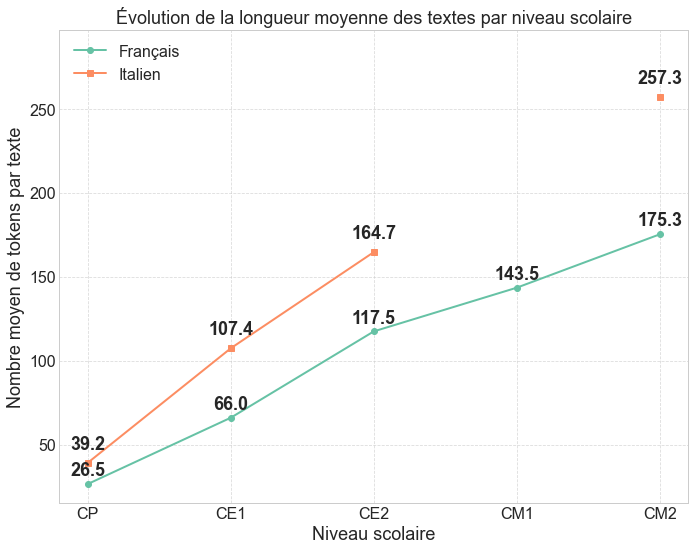

In [15]:
# Données pour la longueur moyenne des textes par niveau
data_length = {
    'Niveau': ['CP', 'CE1', 'CE2', 'CM1', 'CM2'],
    'Français': [26.50, 66.00, 117.45, 143.49, 175.29],
    'Italien': [39.18, 107.41, 164.70, np.nan, 257.29]
}

# Création d'un DataFrame
df_length = pd.DataFrame(data_length)

# Affichage du tableau
print(df_length)

plt.figure(figsize=(10, 8))  # altezza aumentata
plt.plot(df_length['Niveau'], df_length['Français'], marker='o', linewidth=2, label='Français')
plt.plot(df_length['Niveau'], df_length['Italien'], marker='s', linewidth=2, label='Italien')
plt.title('Évolution de la longueur moyenne des textes par niveau scolaire')
plt.xlabel('Niveau scolaire')
plt.ylabel('Nombre moyen de tokens par texte')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

# Limite supérieure du graphique pour faire de la place aux étiquettes
max_value = max(df_length['Français'].max(), df_length['Italien'].max(skipna=True))
plt.ylim(top=max_value + 40)

# Ajout des valeurs sur les points
for i, v in enumerate(df_length['Français']):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', fontweight='bold')

for i, v in enumerate(df_length['Italien']):
    if not np.isnan(v):
        plt.text(i, v + 8, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

           Mesure  Français CE1  Français CE2  Italien CE1  Italien CE2
0  Total mentions          1197          1944         1992         2837
1   Total chaînes           222           283          275          330
2    Chaînes (3+)           150           192          194          216
3   Anaphores (2)            31            41           28           43
4  Singletons (1)            41            50           53           71


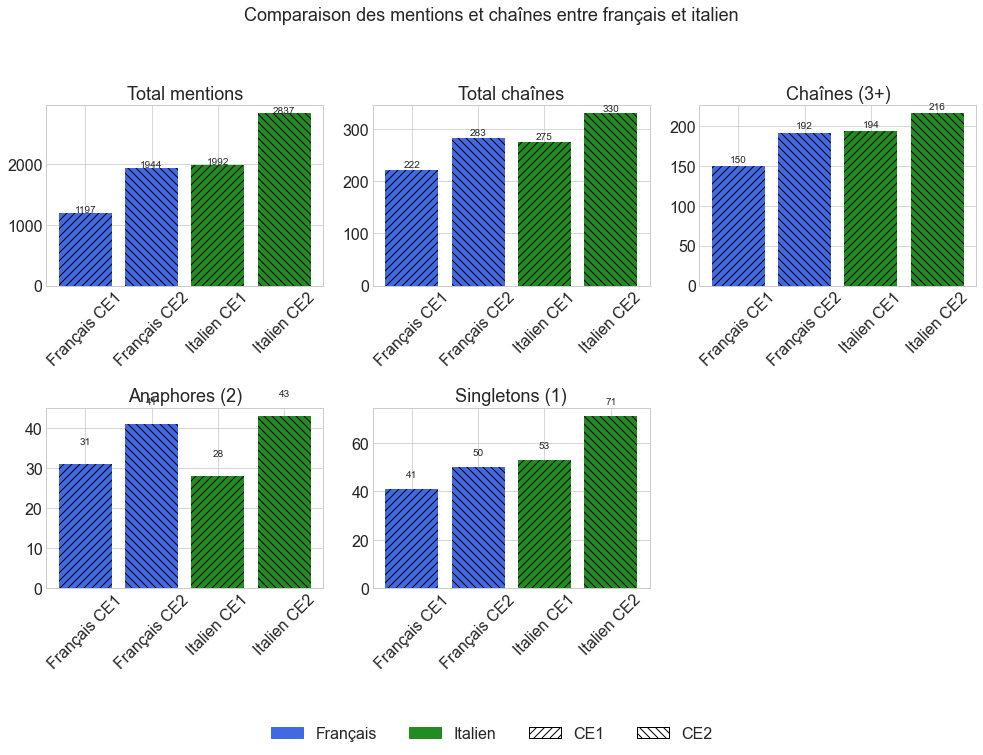

In [30]:
# Données pour les mentions et chaînes
data_mentions = {
    'Mesure': ['Total mentions', 'Total chaînes', 'Chaînes (3+)', 'Anaphores (2)', 'Singletons (1)'],
    'Français CE1': [1197, 222, 150, 31, 41],
    'Français CE2': [1944, 283, 192, 41, 50],
    'Italien CE1': [1992, 275, 194, 28, 53],
    'Italien CE2': [2837, 330, 216, 43, 71]
}

# Création du DataFrame
df_mentions = pd.DataFrame(data_mentions)
print(df_mentions)

# Réorganisation des données pour la visualisation
df_plot = pd.melt(df_mentions, 
                  id_vars=['Mesure'], 
                  value_vars=['Français CE1', 'Français CE2', 'Italien CE1', 'Italien CE2'],
                  var_name='Langue_Niveau', 
                  value_name='Nombre')

# Séparation de la colonne Langue_Niveau en deux colonnes distinctes
df_plot[['Langue', 'Niveau']] = df_plot['Langue_Niveau'].str.split(' ', expand=True)

# Création du graphique pour chaque mesure
plt.figure(figsize=(14, 10))

# Utilisation de différentes couleurs pour les langues et des motifs pour les niveaux
colors = {'Français': 'royalblue', 'Italien': 'forestgreen'}
hatches = {'CE1': '///', 'CE2': '\\\\\\'}

# Création des barres groupées
for i, measure in enumerate(df_mentions['Mesure']):
    plt.subplot(2, 3, i+1)
    
    # Filtrage des données pour la mesure actuelle
    df_measure = df_plot[df_plot['Mesure'] == measure]
    
    # Création du barplot
    bars = plt.bar(df_measure['Langue_Niveau'], df_measure['Nombre'], color=[colors[lang] for lang in df_measure['Langue']])
    
    # Ajout des hachures pour distinguer les niveaux
    for j, bar in enumerate(bars):
        bar.set_hatch(hatches[df_measure.iloc[j]['Niveau']])
    
    # Ajout des valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', fontsize=10)
    
    plt.title(measure)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Ajout d'une légende commune
plt.figlegend(
    handles=[
        plt.Rectangle((0,0),1,1, color=colors['Français'], label='Français'),
        plt.Rectangle((0,0),1,1, color=colors['Italien'], label='Italien'),
        plt.Rectangle((0,0),1,1, facecolor='white', hatch=hatches['CE1'], edgecolor='black', label='CE1'),
        plt.Rectangle((0,0),1,1, facecolor='white', hatch=hatches['CE2'], edgecolor='black', label='CE2')
    ],
    loc='upper center', 
    bbox_to_anchor=(0.5, 0),
    ncol=4
)

plt.suptitle('Comparaison des mentions et chaînes entre français et italien', fontsize=18)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

               Indicateur  Français CE1  Français CE2  Italien CE1  \
0  Nb moy référents/texte          3.00          3.82         3.66   
1         Len moy chaînes          8.50          7.29         9.71   
2             Densité (%)         22.12         21.17        22.12   
3           Interdistance          6.33          8.28         7.83   

   Italien CE2  
0         4.40  
1        12.41  
2        21.63  
3         9.35  


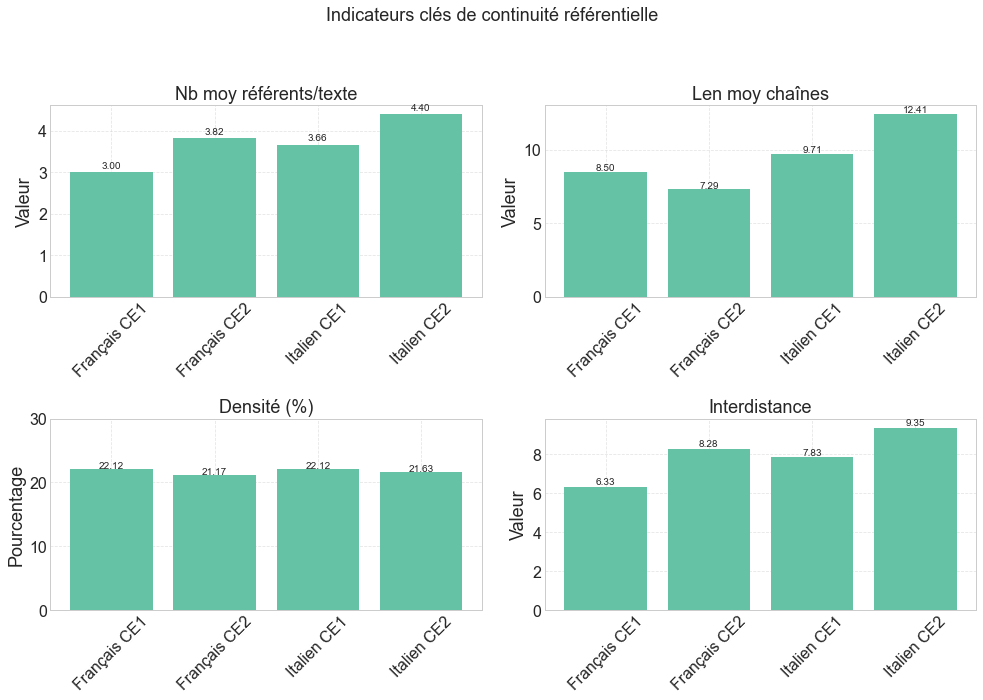

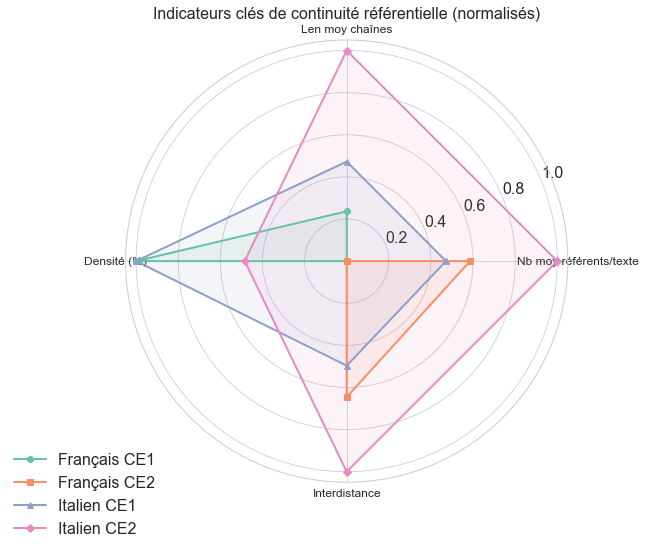

In [31]:
# Données pour les indicateurs clés
data_indicators = {
    'Indicateur': ['Nb moy référents/texte', 'Len moy chaînes', 'Densité (%)', 'Interdistance'],
    'Français CE1': [3.00, 8.50, 22.12, 6.33],
    'Français CE2': [3.82, 7.29, 21.17, 8.28],
    'Italien CE1': [3.66, 9.71, 22.12, 7.83],
    'Italien CE2': [4.40, 12.41, 21.63, 9.35]
}

# Création du DataFrame
df_indicators = pd.DataFrame(data_indicators)
print(df_indicators)

# Création d'un graphique en barres multiples pour comparer les indicateurs
plt.figure(figsize=(14, 10))

# Pour chaque indicateur, créer un sous-graphique
for i, indicator in enumerate(df_indicators['Indicateur']):
    plt.subplot(2, 2, i+1)
    
    # Extraire les données pour cet indicateur
    ind_data = df_indicators.loc[df_indicators['Indicateur'] == indicator, 
                                 ['Français CE1', 'Français CE2', 'Italien CE1', 'Italien CE2']].values[0]
    
    # Créer le barplot
    bars = plt.bar(['Français CE1', 'Français CE2', 'Italien CE1', 'Italien CE2'], ind_data)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height:.2f}', ha='center', fontsize=10)
    
    # Formater les axes
    plt.title(indicator)
    plt.xticks(rotation=45)
    if indicator == 'Densité (%)':
        plt.ylabel('Pourcentage')
        plt.ylim(0, 30)  # Ajuster l'échelle pour la densité
    else:
        plt.ylabel('Valeur')
    
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Indicateurs clés de continuité référentielle', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Création d'un graphique radar
# Préparer les données pour le graphique radar
categories = df_indicators['Indicateur'].tolist()
fr_ce1 = df_indicators['Français CE1'].tolist()
fr_ce2 = df_indicators['Français CE2'].tolist()
it_ce1 = df_indicators['Italien CE1'].tolist()
it_ce2 = df_indicators['Italien CE2'].tolist()

# Normaliser les données pour le graphique radar
# Trouver les valeurs min et max pour chaque indicateur
min_vals = df_indicators.iloc[:, 1:].min(axis=1).tolist()
max_vals = df_indicators.iloc[:, 1:].max(axis=1).tolist()

# Fonction de normalisation entre 0 et 1
def normalize(value, min_val, max_val):
    if max_val == min_val:
        return 0.5  # Si min et max sont égaux, retourner 0.5
    return (value - min_val) / (max_val - min_val)

# Normaliser les valeurs
fr_ce1_norm = [normalize(fr_ce1[i], min_vals[i], max_vals[i]) for i in range(len(categories))]
fr_ce2_norm = [normalize(fr_ce2[i], min_vals[i], max_vals[i]) for i in range(len(categories))]
it_ce1_norm = [normalize(it_ce1[i], min_vals[i], max_vals[i]) for i in range(len(categories))]
it_ce2_norm = [normalize(it_ce2[i], min_vals[i], max_vals[i]) for i in range(len(categories))]

# Créer le graphique radar
plt.figure(figsize=(10, 8))
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

fr_ce1_norm += fr_ce1_norm[:1]
fr_ce2_norm += fr_ce2_norm[:1]
it_ce1_norm += it_ce1_norm[:1]
it_ce2_norm += it_ce2_norm[:1]
categories += categories[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories[:-1], size=12)

ax.plot(angles, fr_ce1_norm, 'o-', linewidth=2, label='Français CE1')
ax.plot(angles, fr_ce2_norm, 's-', linewidth=2, label='Français CE2')
ax.plot(angles, it_ce1_norm, '^-', linewidth=2, label='Italien CE1')
ax.plot(angles, it_ce2_norm, 'D-', linewidth=2, label='Italien CE2')
ax.fill(angles, fr_ce1_norm, alpha=0.1)
ax.fill(angles, fr_ce2_norm, alpha=0.1)
ax.fill(angles, it_ce1_norm, alpha=0.1)
ax.fill(angles, it_ce2_norm, alpha=0.1)

plt.title('Indicateurs clés de continuité référentielle (normalisés)', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()

                  Type  Français  Italien  Français (%)  Italien (%)
0               Pronom        22       11      6.432749     2.682927
1            SN défini        78      118     22.807018    28.780488
2          SN indéfini       199      209     58.187135    50.975610
3         SN possessif        21       23      6.140351     5.609756
4      SN démonstratif         3        0      0.877193     0.000000
5  SN sans déterminant         0        1      0.000000     0.243902
6           Nom propre         5       11      1.461988     2.682927
7        Anaphore zéro         0       28      0.000000     6.829268
8                Autre        14        9      4.093567     2.195122


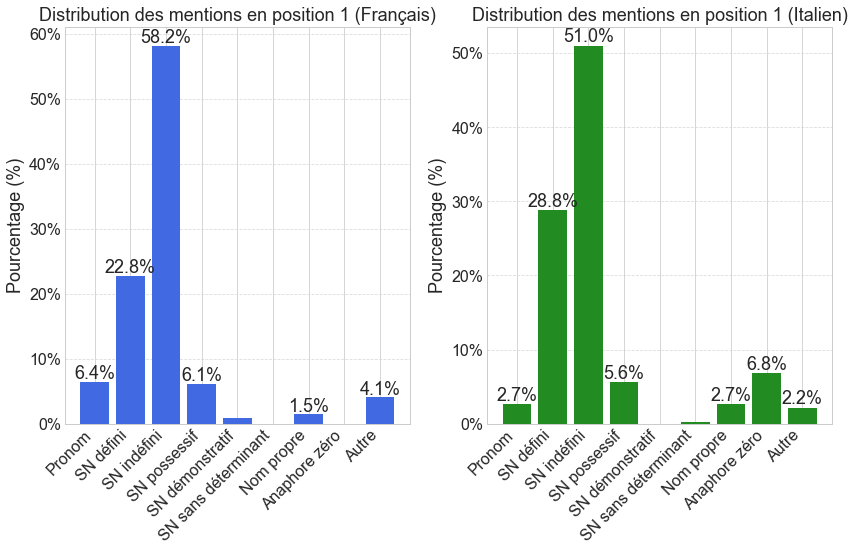

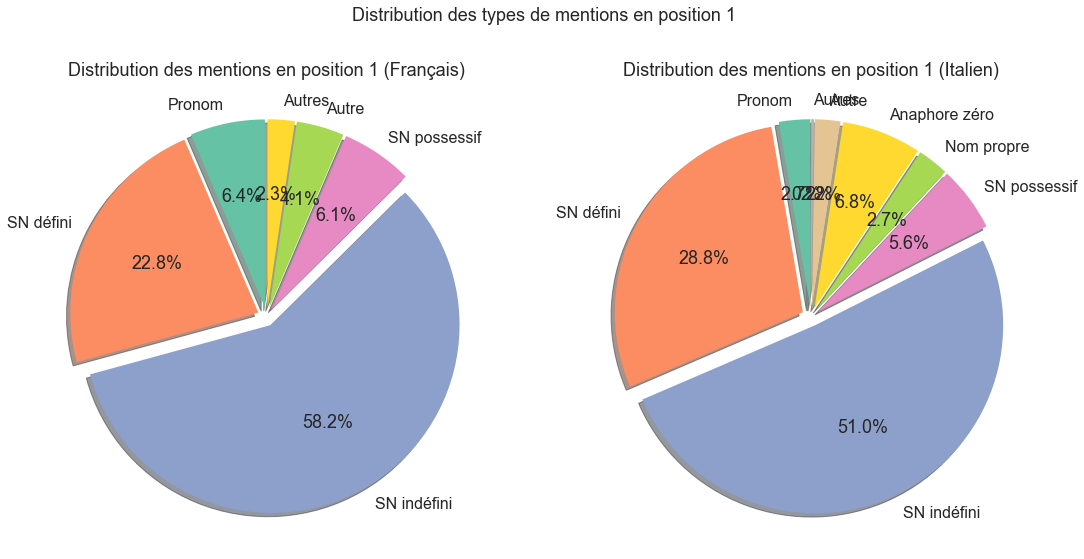

In [32]:
# Données pour la distribution des mentions en position 1
data_pos1 = {
    'Type': ['Pronom', 'SN défini', 'SN indéfini', 'SN possessif', 'SN démonstratif', 
             'SN sans déterminant', 'Nom propre', 'Anaphore zéro', 'Autre'],
    'Français': [22, 78, 199, 21, 3, 0, 5, 0, 14],
    'Italien': [11, 118, 209, 23, 0, 1, 11, 28, 9]
}

# Création du DataFrame
df_pos1 = pd.DataFrame(data_pos1)

# Calculer les pourcentages
total_fr = df_pos1['Français'].sum()
total_it = df_pos1['Italien'].sum()
df_pos1['Français (%)'] = df_pos1['Français'] / total_fr * 100
df_pos1['Italien (%)'] = df_pos1['Italien'] / total_it * 100

print(df_pos1)

# Création du graphique en barres empilées pour les pourcentages
plt.figure(figsize=(12, 8))

# Barres pour le français
plt.subplot(1, 2, 1)
plt.bar(df_pos1['Type'], df_pos1['Français (%)'], color='royalblue')
plt.title('Distribution des mentions en position 1 (Français)')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des pourcentages sur les barres
for i, v in enumerate(df_pos1['Français (%)']):
    if v > 1:  # Seulement afficher si > 1%
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Barres pour l'italien
plt.subplot(1, 2, 2)
plt.bar(df_pos1['Type'], df_pos1['Italien (%)'], color='forestgreen')
plt.title('Distribution des mentions en position 1 (Italien)')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des pourcentages sur les barres
for i, v in enumerate(df_pos1['Italien (%)']):
    if v > 1:  # Seulement afficher si > 1%
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Création d'un diagramme circulaire pour les pourcentages
plt.figure(figsize=(16, 8))

# Diagramme pour le français
plt.subplot(1, 2, 1)
# Filtrer pour n'inclure que les types avec un pourcentage significatif
significant_types_fr = df_pos1[df_pos1['Français (%)'] > 2]
others_fr = 100 - significant_types_fr['Français (%)'].sum()

# Ajouter une catégorie "Autre" pour les types non significatifs
if others_fr > 0:
    significant_types_fr = pd.concat([
        significant_types_fr,
        pd.DataFrame({'Type': ['Autres'], 'Français': [0], 'Italien': [0], 
                      'Français (%)': [others_fr], 'Italien (%)': [0]})
    ])

plt.pie(significant_types_fr['Français (%)'], 
        labels=significant_types_fr['Type'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05] * len(significant_types_fr))
plt.title('Distribution des mentions en position 1 (Français)')

# Diagramme pour l'italien
plt.subplot(1, 2, 2)
# Filtrer pour n'inclure que les types avec un pourcentage significatif
significant_types_it = df_pos1[df_pos1['Italien (%)'] > 2]
others_it = 100 - significant_types_it['Italien (%)'].sum()

# Ajouter une catégorie "Autre" pour les types non significatifs
if others_it > 0:
    significant_types_it = pd.concat([
        significant_types_it,
        pd.DataFrame({'Type': ['Autres'], 'Français': [0], 'Italien': [0], 
                      'Français (%)': [0], 'Italien (%)': [others_it]})
    ])

plt.pie(significant_types_it['Italien (%)'], 
        labels=significant_types_it['Type'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05] * len(significant_types_it))
plt.title('Distribution des mentions en position 1 (Italien)')

plt.suptitle('Distribution des types de mentions en position 1', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

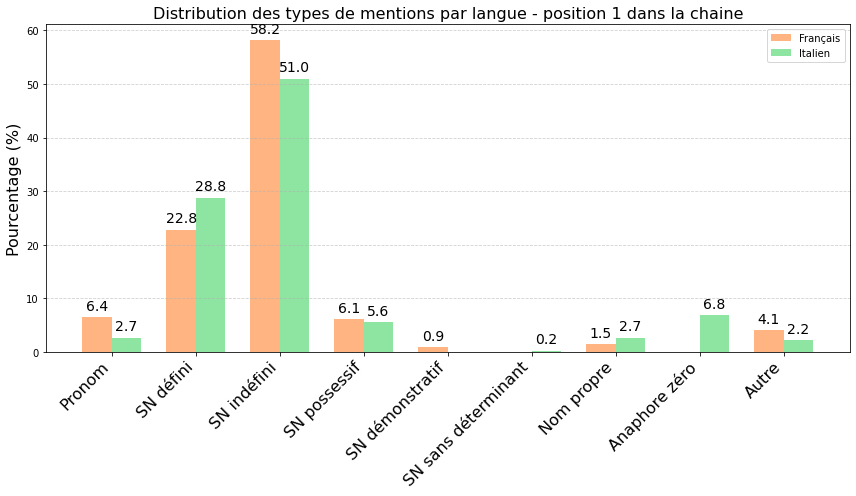

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Palette de couleurs
colors = sns.color_palette("pastel")

# type des mentions en position 1 + pourcentages déjà calculés 
data = {
    'Type': ['Pronom', 'SN défini', 'SN indéfini', 'SN possessif', 'SN démonstratif',
             'SN sans déterminant', 'Nom propre', 'Anaphore zéro', 'Autre'],
    'Français': [22, 78, 199, 21, 3, 0, 5, 0, 14],
    'Italien': [11, 118, 209, 23, 0, 1, 11, 28, 9],
    'Français (%)': [6.43, 22.81, 58.19, 6.14, 0.88, 0.0, 1.46, 0.0, 4.09],
    'Italien (%)': [2.68, 28.78, 50.98, 5.61, 0.0, 0.24, 2.68, 6.83, 2.20]
}

df = pd.DataFrame(data)

data2 = {
    'Type': ['Pronom', 'SN défini', 'SN indéfini', 'SN possessif', 'SN démonstratif',
             'SN sans déterminant', 'Nom propre', 'Anaphore zéro', 'Autre'],
    'Français': [169, 75, 36, , , , , , ],
    'Italien': [121, 76, , 89, , , , , ]
}

# Calculer les pourcentages
total_fr = df_pos1['Français'].sum()
total_it = df_pos1['Italien'].sum()
df_pos1['Français (%)'] = df_pos1['Français'] / total_fr * 100
df_pos1['Italien (%)'] = df_pos1['Italien'] / total_it * 100



# Préparation des données
types = df['Type']
x = np.arange(len(types))  # positions des groupes
width = 0.35  # largeur des barres

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, df['Français (%)'], width, label='Français', color=colors[1])
rects2 = ax.bar(x + width/2, df['Italien (%)'], width, label='Italien', color=colors[2])

# Ajouter les labels et axes
ax.set_ylabel('Pourcentage (%)', fontsize=16)
ax.set_title('Distribution des types de mentions par langue - position 1 dans la chaine', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(types, rotation=45, ha='right', fontsize=16)
ax.legend(loc='upper right')

# Ajouter les valeurs sur les barres
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # décalage vertical
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


                  Type  Français  Italien  Français (%)  Italien (%)
0               Pronom      1307      945     41.610952    19.569269
1            SN défini       859     1250     27.347978    25.885276
2          SN indéfini       306      397      9.742120     8.221164
3         SN possessif       313      308      9.964979     6.378132
4      SN démonstratif        20       35      0.636740     0.724788
5  SN sans déterminant        42       56      1.337154     1.159660
6           Nom propre       123      323      3.915950     6.688755
7        Anaphore zéro       132     1473      4.202483    30.503210
8                Autre        39       42      1.241643     0.869745


<Figure size 864x576 with 0 Axes>

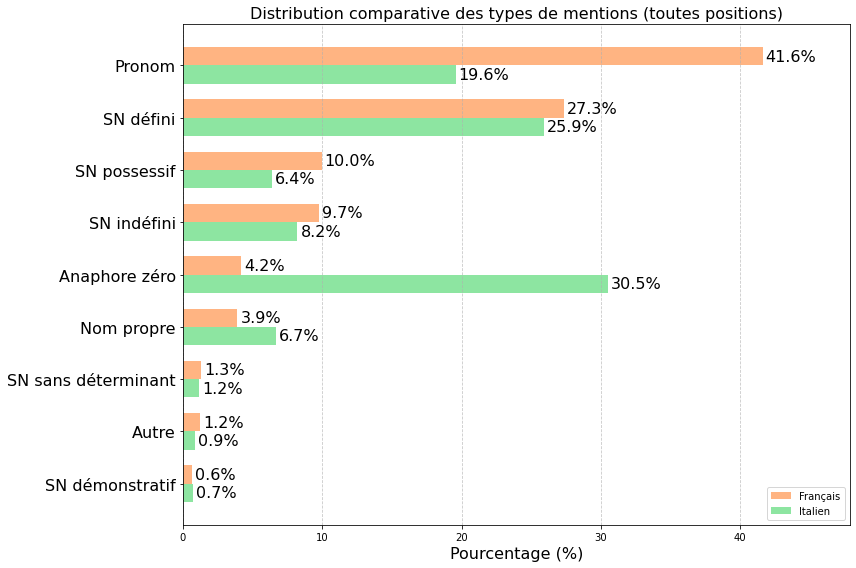

In [27]:
colors = sns.color_palette("pastel")
# Données pour la distribution de toutes les mentions
data_all_pos = {
    'Type': ['Pronom', 'SN défini', 'SN indéfini', 'SN possessif', 'SN démonstratif', 
             'SN sans déterminant', 'Nom propre', 'Anaphore zéro', 'Autre'],
    'Français': [1307, 859, 306, 313, 20, 42, 123, 132, 39],
    'Italien': [945, 1250, 397, 308, 35, 56, 323, 1473, 42]
}

# Création du DataFrame
df_all_pos = pd.DataFrame(data_all_pos)

# Calculer les pourcentages
total_fr_all = df_all_pos['Français'].sum()
total_it_all = df_all_pos['Italien'].sum()
df_all_pos['Français (%)'] = df_all_pos['Français'] / total_fr_all * 100
df_all_pos['Italien (%)'] = df_all_pos['Italien'] / total_it_all * 100

print(df_all_pos)

# Création d'un graphique à barres horizontales comparatives
plt.figure(figsize=(12, 8))

# Trier par importance des types pour le français
df_sorted = df_all_pos.sort_values('Français (%)', ascending=False)

# Créer les barres horizontales
y_pos = np.arange(len(df_sorted['Type']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(y_pos - width/2, df_sorted['Français (%)'], width, label='Français', color=colors[1])
rects2 = ax.barh(y_pos + width/2, df_sorted['Italien (%)'], width, label='Italien', color=colors[2])

# Ajouter les labels et les titres
ax.set_yticks(y_pos)
ax.set_yticklabels(df_sorted['Type'], fontsize=18)
ax.invert_yaxis()  # Pour que les types les plus fréquents soient en haut
ax.set_xlabel('Pourcentage (%)', fontsize=20)
ax.set_title('Distribution comparative des types de mentions (toutes positions)', fontsize=20)
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Ajouter les pourcentages sur les barres
def add_percent_labels(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=16)

add_percent_labels(rects1)
add_percent_labels(rects2)

# Définir dynamiquement la limite supérieure de l'axe x
max_percent = max(df_sorted['Français (%)'].max(), df_sorted['Italien (%)'].max())
ax.set_xlim(0, max_percent * 1.15)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  Niveau  Densité FR  Densité IT  Interdistance FR  Interdistance IT
0    CE1       22.12       22.12              6.33              7.83
1    CE2       21.17       21.63              8.28              9.35


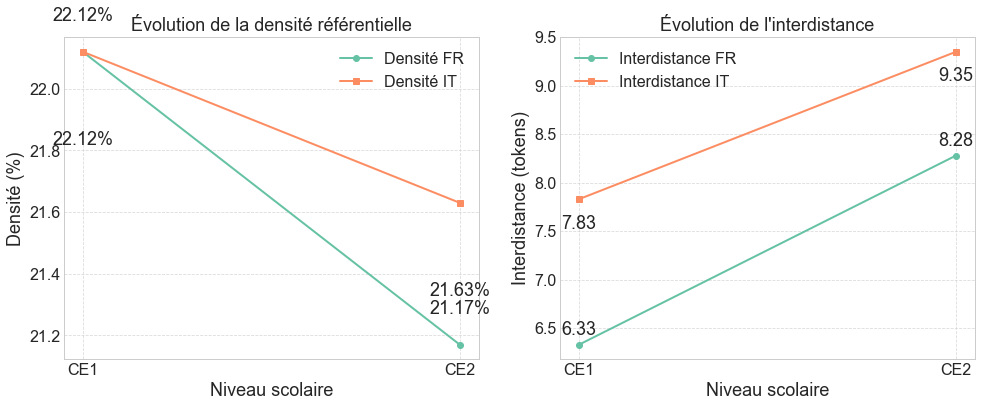

In [34]:
# Données pour la densité et l'interdistance
data_density = {
    'Niveau': ['CE1', 'CE2'],
    'Densité FR': [22.12, 21.17],
    'Densité IT': [22.12, 21.63],
    'Interdistance FR': [6.33, 8.28],
    'Interdistance IT': [7.83, 9.35]
}

# Création du DataFrame
df_density = pd.DataFrame(data_density)
print(df_density)

# Création d'un graphique à lignes multiples
plt.figure(figsize=(14, 6))

# Graphique pour la densité
plt.subplot(1, 2, 1)
plt.plot(df_density['Niveau'], df_density['Densité FR'], 'o-', linewidth=2, label='Densité FR')
plt.plot(df_density['Niveau'], df_density['Densité IT'], 's-', linewidth=2, label='Densité IT')
plt.title('Évolution de la densité référentielle')
plt.xlabel('Niveau scolaire')
plt.ylabel('Densité (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Ajout des valeurs sur les points
for i, v in enumerate(df_density['Densité FR']):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')
    
for i, v in enumerate(df_density['Densité IT']):
    plt.text(i, v - 0.3, f'{v:.2f}%', ha='center')

# Graphique pour l'interdistance
plt.subplot(1, 2, 2)
plt.plot(df_density['Niveau'], df_density['Interdistance FR'], 'o-', linewidth=2, label='Interdistance FR')
plt.plot(df_density['Niveau'], df_density['Interdistance IT'], 's-', linewidth=2, label='Interdistance IT')
plt.title('Évolution de l\'interdistance')
plt.xlabel('Niveau scolaire')
plt.ylabel('Interdistance (tokens)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Ajout des valeurs sur les points
for i, v in enumerate(df_density['Interdistance FR']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
    
for i, v in enumerate(df_density['Interdistance IT']):
    plt.text(i, v - 0.3, f'{v:.2f}', ha='center')
    
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23412/2699751694.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Langue_Niveau', y='Valeur', data=df_filtered, ax=ax, palette=colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23412/2699751694.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Langue_Niveau', y='Valeur', data=df_filtered, ax=ax, palette=colors)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_23412/2699751694.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.

<Figure size 1008x720 with 0 Axes>

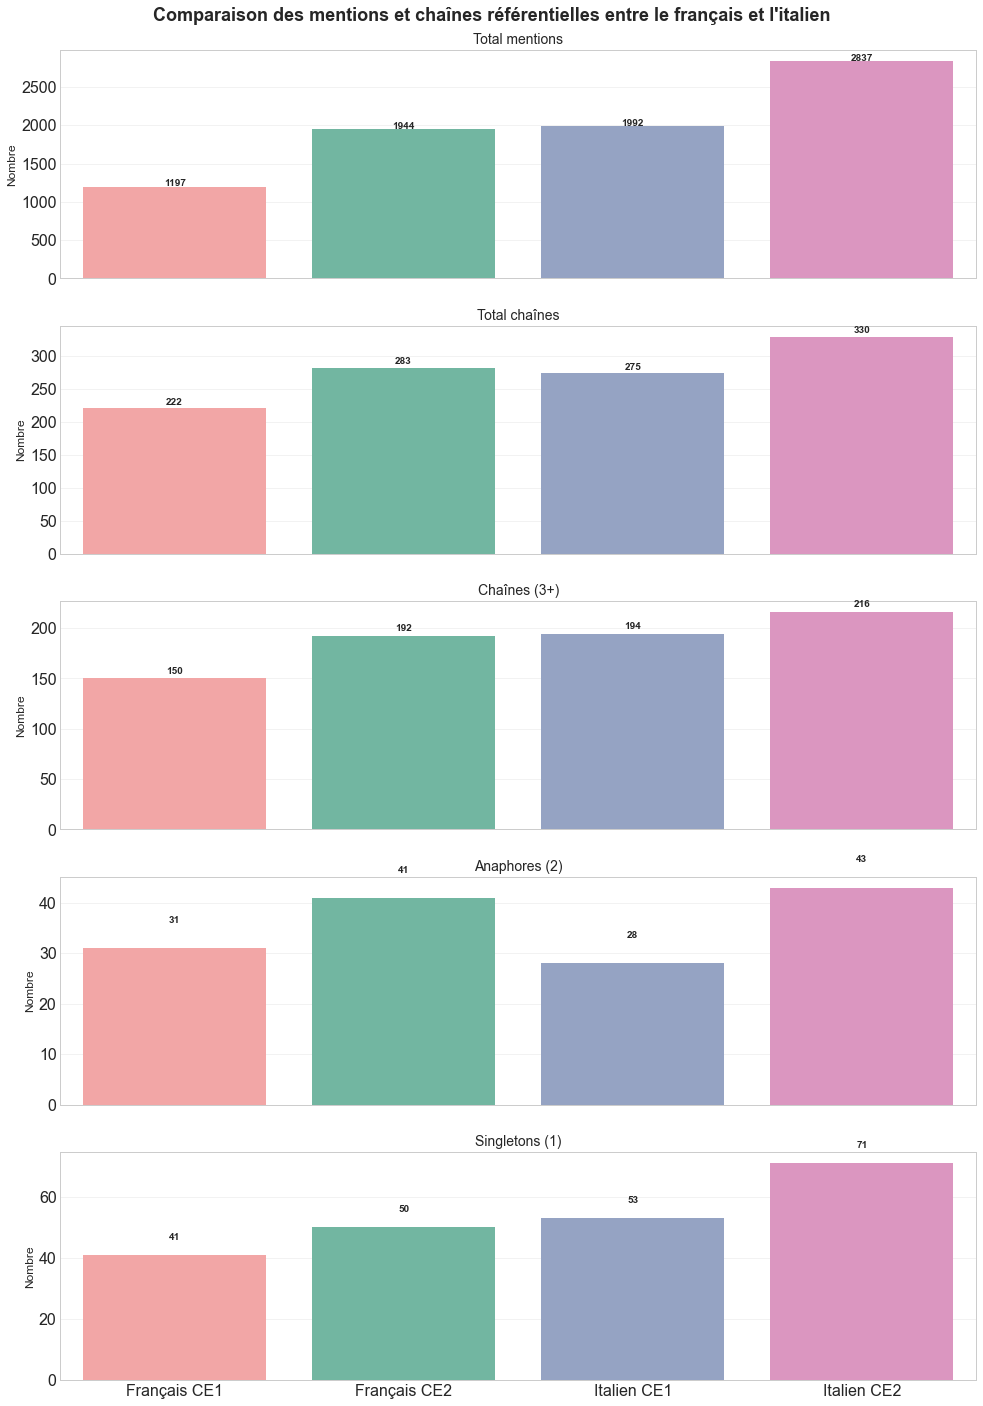

In [35]:
# Version corrigée pour le graphique 2: Comparaison des mentions et chaînes

# Conversion du DataFrame pour faciliter la visualisation
df_mentions_melted = pd.melt(df_mentions, 
                            id_vars='Mesure', 
                            value_vars=['Français CE1', 'Français CE2', 'Italien CE1', 'Italien CE2'],
                            var_name='Langue_Niveau', 
                            value_name='Valeur')

# Séparation de la colonne Langue_Niveau en deux colonnes distinctes
df_mentions_melted[['Langue', 'Niveau']] = df_mentions_melted['Langue_Niveau'].str.split(' ', expand=True)

# Création du graphique
plt.figure(figsize=(14, 10))

# Création d'une sous-figure pour chaque mesure
fig, axes = plt.subplots(nrows=len(df_mentions['Mesure']), ncols=1, figsize=(14, 20), sharex=True)
fig.suptitle('Comparaison des mentions et chaînes référentielles entre le français et l\'italien', 
             fontsize=18, fontweight='bold', y=0.98)

# Couleurs pour chaque groupe
colors = ['#ff9999', '#66c2a5', '#8da0cb', '#e78ac3']

# Pour chaque mesure, créer un sous-graphique
for i, mesure in enumerate(df_mentions['Mesure']):
    # Filtrer les données pour cette mesure
    df_filtered = df_mentions_melted[df_mentions_melted['Mesure'] == mesure]
    
    # Créer le barplot
    ax = axes[i]
    bars = sns.barplot(x='Langue_Niveau', y='Valeur', data=df_filtered, ax=ax, palette=colors)
    
    # Ajouter les annotations
    for j, p in enumerate(bars.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{int(height)}', ha="center", fontsize=10, fontweight='bold')
    
    # Titre et étiquettes
    ax.set_title(f'{mesure}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Nombre', fontsize=12)
    
    # Grille
    ax.grid(axis='y', alpha=0.3)

# Ajuster l'espacement
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('comparaison_mentions_subplots.png', dpi=300, bbox_inches='tight')

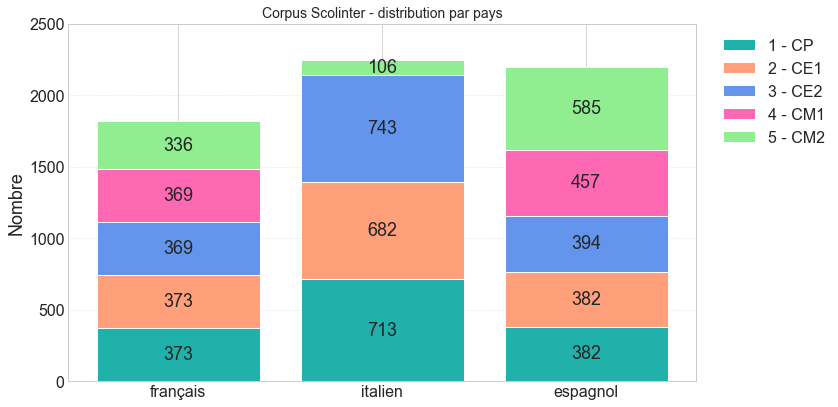

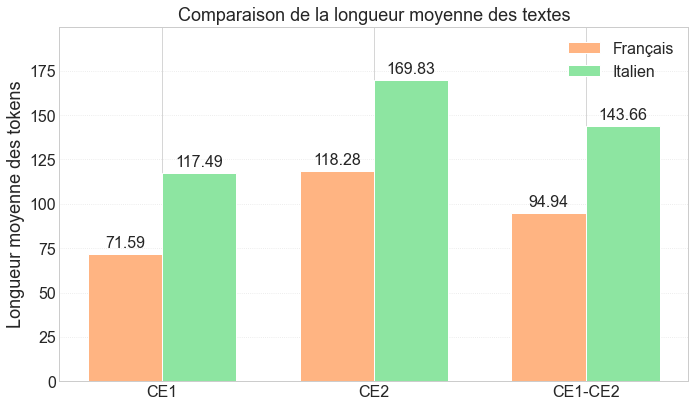

In [39]:
import matplotlib.pyplot as plt
import numpy as np
colors = sns.color_palette("pastel")


# Données extraites du tableau
niveaux = ['CE1', 'CE2', 'CE1-CE2']
fr_values = [71.59, 118.28, 94.94]
it_values = [117.49, 169.83, 143.66]

# Largeur des barres
bar_width = 0.35
x = np.arange(len(niveaux))

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour le français et l'italien
bars1 = ax.bar(x - bar_width/2, fr_values, bar_width, label='Français', color=colors[1])
bars2 = ax.bar(x + bar_width/2, it_values, bar_width, label='Italien', color=colors[2])

# Étiquettes
ax.set_ylabel('Longueur moyenne des tokens')
ax.set_title('Comparaison de la longueur moyenne des textes')
ax.set_xticks(x)
ax.set_xticklabels(niveaux)
ax.legend()

# Ajout des valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.2f}', ha='center', va='bottom', fontsize=16)

add_labels(bars1)
add_labels(bars2)

plt.ylim(0, max(it_values) + 30)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


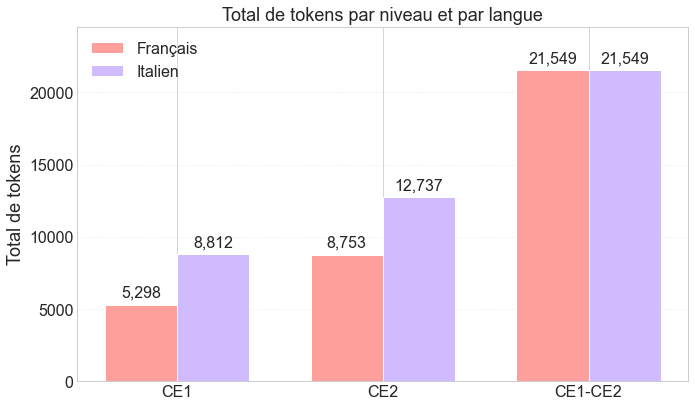

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Données
niveaux = ['CE1', 'CE2', 'CE1-CE2']
fr_totals = [5298, 8753, 21549]
it_totals = [8812, 12737, 21549]

# Position des barres
bar_width = 0.35
x = np.arange(len(niveaux))

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour Français et Italien
bars_fr = ax.bar(x - bar_width/2, fr_totals, bar_width, label='Français', color=colors[3])
bars_it = ax.bar(x + bar_width/2, it_totals, bar_width, label='Italien', color=colors[4])

# Titres et axes
ax.set_ylabel('Total de tokens')
ax.set_title('Total de tokens par niveau et par langue')
ax.set_xticks(x)
ax.set_xticklabels(niveaux)
ax.legend()

# Ajout des valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'{height:,}', ha='center', va='bottom', fontsize=16)

add_labels(bars_fr)
add_labels(bars_it)

# Ajustements visuels
plt.ylim(0, max(it_totals) + 3000)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


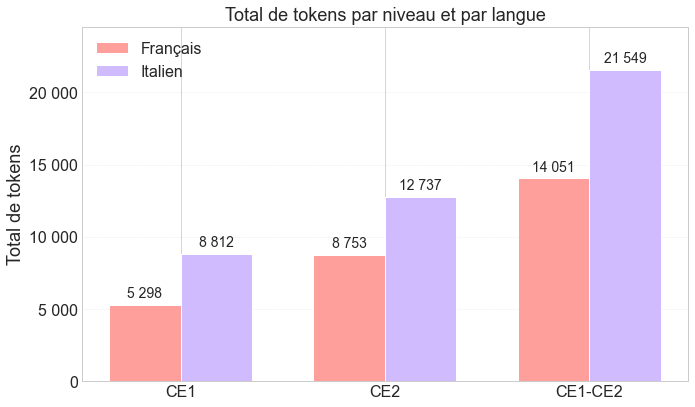

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Données
niveaux = ['CE1', 'CE2', 'CE1-CE2']
fr_totals = [5298, 8753, 14051]
it_totals = [8812, 12737, 21549]

# Position des barres
bar_width = 0.35
x = np.arange(len(niveaux))

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour Français et Italien
bars_fr = ax.bar(x - bar_width/2, fr_totals, bar_width, label='Français', color=colors[3])
bars_it = ax.bar(x + bar_width/2, it_totals, bar_width, label='Italien', color=colors[4])

# Titres et axes
ax.set_ylabel('Total de tokens')
ax.set_title('Total de tokens par niveau et par langue')
ax.set_xticks(x)
ax.set_xticklabels(niveaux)
ax.legend()

# ✅ Formatter pour supprimer la virgule et mettre un espace
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))
ax.yaxis.set_major_formatter(formatter)

# ✅ Ajout des valeurs sur les barres avec espace
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        label = f'{int(height):,}'.replace(',', ' ')
        ax.text(bar.get_x() + bar.get_width()/2., height + 300,
                label, ha='center', va='bottom', fontsize=14)

add_labels(bars_fr)
add_labels(bars_it)

# Esthétique
plt.ylim(0, max(it_totals) + 3000)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


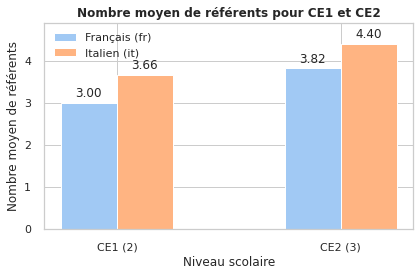

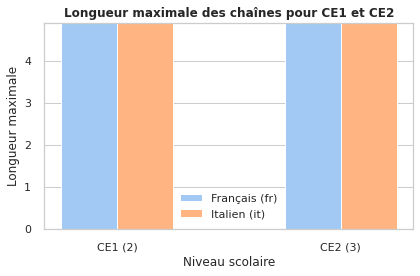

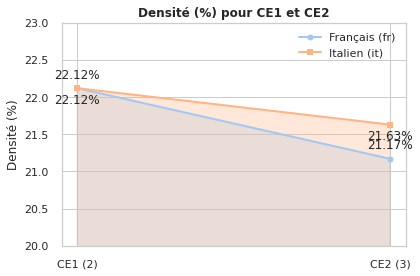

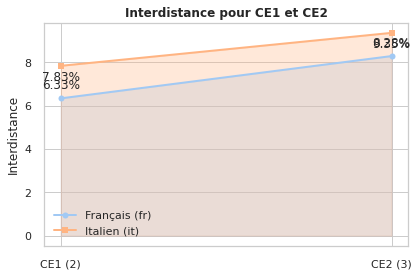

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Style & Settings ---
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

colors = sns.color_palette("pastel")
fr_color, it_color = colors[0], colors[1]

niveaux = ['CE1 (2)', 'CE2 (3)']
x = np.arange(len(niveaux))
bar_width = 0.35

# --- Data ---
data = {
    "Nombre moyen de référents": ([3, 3.82], [3.66, 4.4], 'Nombre moyen de référents', 'nombre_moyen_de_référents'),
    "Longueur maximale des chaînes": ([30, 35], [58, 35], 'Longueur maximale', 'longueur_maximale_des_chaînes'),
    "Densité (%)": ([22.12, 21.17], [22.12, 21.63], 'Densité (%)', 'densité', 20, 23),
    "Interdistance": ([6.33, 8.28], [7.83, 9.35], 'Interdistance', 'interdistance')
}

# --- Utility Functions ---
def add_bar_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

def bar_plot(title, fr_data, it_data, ylabel, filename):
    max_fr = max(referents_fr)
    max_it = max(referents_it)
    max_value = max(max_fr, max_it)

    fig, ax = plt.subplots(figsize=(6, 4))
    bar_width = 0.25
    bars1 = ax.bar(x - bar_width/2, fr_data, bar_width, label='Français (fr)', color=fr_color)
    bars2 = ax.bar(x + bar_width/2, it_data, bar_width, label='Italien (it)', color=it_color)
    add_bar_labels(ax, bars1)
    add_bar_labels(ax, bars2)
    ax.set_xlabel('Niveau scolaire')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{title} pour CE1 et CE2', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(niveaux)
    ax.set_ylim(0, max_value + 0.5)
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{filename}_pour_ce1_et_ce2.png', dpi=100)

def area_plot(title, fr_data, it_data, ylabel, filename, y_min=None, y_max=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.margins(x=0.05)
    ax.plot(x, fr_data, 'o-', color=fr_color, label='Français (fr)', linewidth=2)
    ax.fill_between(x, fr_data, color=fr_color, alpha=0.3)
    ax.plot(x, it_data, 's-', color=it_color, label='Italien (it)', linewidth=2)
    ax.fill_between(x, it_data, color=it_color, alpha=0.3)
    for i, (fr, it) in enumerate(zip(fr_data, it_data)):
        ax.annotate(f'{fr:.2f}%', xy=(i, fr), xytext=(0, 10), textcoords='offset points', ha='center')
        ax.annotate(f'{it:.2f}%', xy=(i, it), xytext=(0, -15), textcoords='offset points', ha='center')
    ax.set_xticks(x)
    ax.set_xticklabels(niveaux)

    ax.set_ylabel(ylabel)
    ax.set_title(f'{title} pour CE1 et CE2', fontweight='bold')
    ax.legend()
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    plt.tight_layout()
    plt.savefig(f'{filename}_pour_ce1_et_ce2.png', dpi=100)

# --- Plot all charts ---
for key, values in data.items():
    if 'Densité' in key or 'Interdistance' in key:
        # Unpack normally
        fr_data, it_data, ylabel, filename, *ylim = values
        if ylim:
            y_min, y_max = ylim
        else:
            y_min = y_max = None
        area_plot(key, fr_data, it_data, ylabel, filename, y_min, y_max)
    else:
        fr_data, it_data, ylabel, filename = values
        bar_plot(key, fr_data, it_data, ylabel, filename)



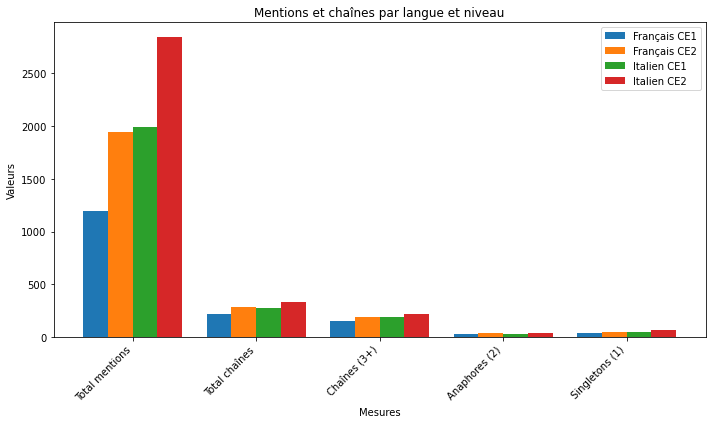

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Données
data_mentions = {
    'Mesure': ['Total mentions', 'Total chaînes', 'Chaînes (3+)', 'Anaphores (2)', 'Singletons (1)'],
    'Français CE1': [1197, 222, 150, 31, 41],
    'Français CE2': [1944, 283, 192, 41, 50],
    'Italien CE1': [1992, 275, 194, 28, 53],
    'Italien CE2': [2837, 330, 216, 43, 71]
}

# Paramètres
mesures = data_mentions['Mesure']
groupes = ['Français CE1', 'Français CE2', 'Italien CE1', 'Italien CE2']
n_mesures = len(mesures)
n_groupes = len(groupes)

# Création des positions sur l'axe des x
x = np.arange(n_mesures)
bar_width = 0.2

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer chaque groupe de données
for i, groupe in enumerate(groupes):
    valeurs = data_mentions[groupe]
    ax.bar(x + i * bar_width, valeurs, bar_width, label=groupe)

# Mise en forme
ax.set_xlabel('Mesures')
ax.set_ylabel('Valeurs')
ax.set_title('Mentions et chaînes par langue et niveau')
ax.set_xticks(x + bar_width * (n_groupes - 1) / 2)
ax.set_xticklabels(mesures, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


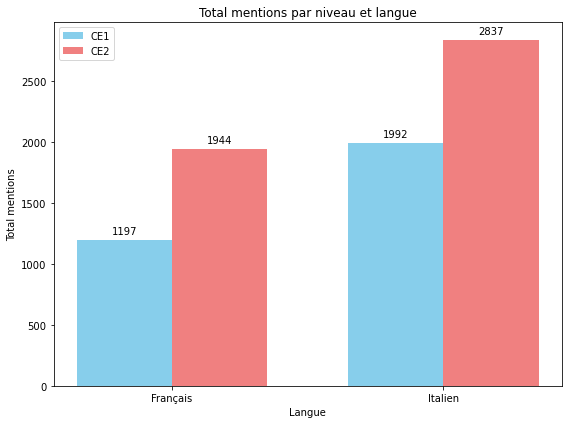

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Données filtrées pour "Total mentions"
groupes = ['Français', 'Italien']
niveaux = ['CE1', 'CE2']
valeurs_ce1 = [1197, 1992]  # Français CE1, Italien CE1
valeurs_ce2 = [1944, 2837]  # Français CE2, Italien CE2

x = np.arange(len(groupes))  # positions: Français, Italien
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Barres
bars_ce1 = ax.bar(x - bar_width/2, valeurs_ce1, bar_width, label='CE1', color='skyblue')
bars_ce2 = ax.bar(x + bar_width/2, valeurs_ce2, bar_width, label='CE2', color='lightcoral')

# Étiquettes de valeur sur les barres
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 30,  # un peu au-dessus de la barre
            f'{height}',
            ha='center',
            va='bottom',
            fontsize=10
        )

add_value_labels(bars_ce1)
add_value_labels(bars_ce2)

# Mise en forme
ax.set_xlabel('Langue')
ax.set_ylabel('Total mentions')
ax.set_title('Total mentions par niveau et langue')
ax.set_xticks(x)
ax.set_xticklabels(groupes)
ax.legend()

plt.tight_layout()
plt.show()


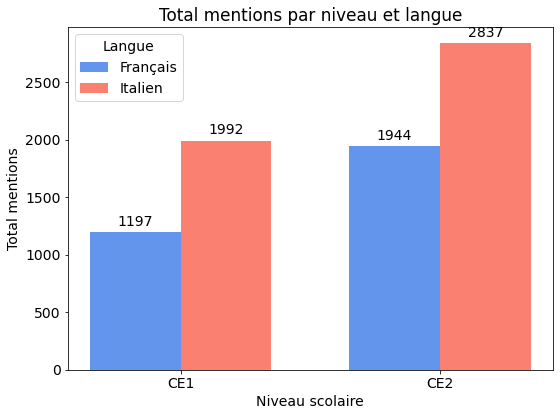

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})
# Données pour "Total mentions"
niveaux = ['CE1', 'CE2']
langues = ['Français', 'Italien']
valeurs = {
    'CE1': [1197, 1992],   # [Français CE1, Italien CE1]
    'CE2': [1944, 2837]    # [Français CE2, Italien CE2]
}

x = np.arange(len(niveaux))  # Positions CE1, CE2
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Barres pour chaque langue dans chaque niveau
bars_fr = ax.bar(x - bar_width/2, [valeurs[n][0] for n in niveaux], bar_width, label='Français', color='cornflowerblue')
bars_it = ax.bar(x + bar_width/2, [valeurs[n][1] for n in niveaux], bar_width, label='Italien', color='salmon')

# Ajouter les étiquettes de valeur au-dessus de chaque barre
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height}', ha='center', va='bottom')

add_value_labels(bars_fr)
add_value_labels(bars_it)

# Mise en forme
ax.set_xlabel('Niveau scolaire')
ax.set_ylabel('Total mentions')
ax.set_title('Total mentions par niveau et langue')
ax.set_xticks(x)
ax.set_xticklabels(niveaux)
ax.legend(title="Langue")

plt.tight_layout()
plt.show()


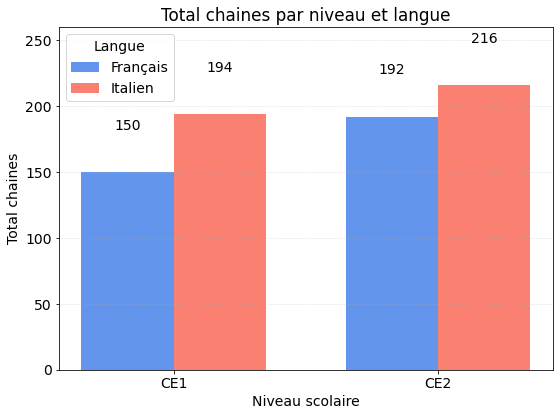

In [15]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams.update({'font.size': 14})
# Données pour "Total chaines"
niveaux = ['CE1', 'CE2']
langues = ['Français', 'Italien']
valeurs = {
    'CE1': [150, 194],   # [Français CE1, Italien CE1]
    'CE2': [192, 216]    # [Français CE2, Italien CE2]
}

x = np.arange(len(niveaux))  # Positions CE1, CE2
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Barres pour chaque langue dans chaque niveau
bars_fr = ax.bar(x - bar_width/2, [valeurs[n][0] for n in niveaux], bar_width, label='Français', color='cornflowerblue')
bars_it = ax.bar(x + bar_width/2, [valeurs[n][1] for n in niveaux], bar_width, label='Italien', color='salmon')

# Ajouter les étiquettes de valeur au-dessus de chaque barre
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height}', ha='center', va='bottom')

add_value_labels(bars_fr)
add_value_labels(bars_it)

# Mise en forme
ax.set_xlabel('Niveau scolaire')
ax.set_ylabel('Total chaines')
ax.set_title('Total chaines par niveau et langue')
plt.ylim(0, 260)
plt.grid(axis='y', linestyle=':', alpha=0.5)
ax.set_xticks(x)
ax.set_xticklabels(niveaux)
ax.legend(title="Langue",loc='upper left')



plt.tight_layout()
plt.show()

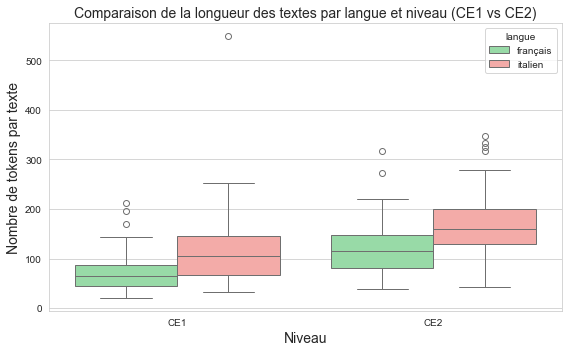

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les fichiers CSV
df_fr = pd.read_csv("./annotations_francais/corpus_francais_v3.csv")
df_it = pd.read_csv("./annotations_italien/corpus_italien.csv")

# Ajouter une colonne 'langue'
df_fr["langue"] = "français"
df_it["langue"] = "italien"

# Extraire le niveau (CE1 ou CE2) depuis la colonne 'texte'
df_fr["niveau"] = df_fr["texte"].str.extract(r"(CE1|CE2)")
df_it["niveau"] = df_it["texte"].str.extract(r"(CE1|CE2)")

# Garder uniquement les colonnes nécessaires et supprimer les lignes incomplètes
df_fr_filtered = df_fr[["nbTokNoPunct", "langue", "niveau"]].dropna()
df_it_filtered = df_it[["nbTokNoPunct", "langue", "niveau"]].dropna()

# Fusionner les deux DataFrames
df_combined = pd.concat([df_fr_filtered, df_it_filtered])

# S'assurer que les niveaux sont bien catégorisés pour l'affichage
df_combined["niveau"] = pd.Categorical(df_combined["niveau"], categories=["CE1", "CE2"])

# Get the full pastel palette (default has 6 colors)
full_palette = sns.color_palette("pastel")

# Select colors #2 and #3 (indexing starts at 0, so these are the 3rd and 4th colors)
selected_colors = [full_palette[2], full_palette[3]]


# Créer le graphique
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combined, x="niveau", y="nbTokNoPunct", hue="langue", palette=selected_colors)
plt.title("Comparaison de la longueur des textes par langue et niveau (CE1 vs CE2)", fontsize=14)
plt.ylabel("Nombre de tokens par texte", fontsize=14)
plt.xlabel("Niveau", fontsize=14)
# Get the legend and increase the title fontsize
legend = ax.legend(title="Langue")
legend.set_title("Langue", prop={'size': 18})  # Change 16 to whatever size you want
plt.tight_layout()
plt.show()


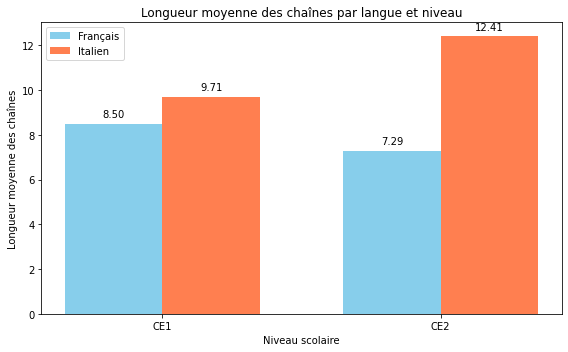

In [5]:
import matplotlib.pyplot as plt

# Données du tableau
niveaux = ["CE1", "CE2"]
fr_values = [8.50, 7.29]
it_values = [9.71, 12.41]

x = range(len(niveaux))  # positions sur l'axe x

# Paramètres du graphique
plt.figure(figsize=(8, 5))
bar_width = 0.35

# Positions des barres
fr_pos = [i - bar_width/2 for i in x]
it_pos = [i + bar_width/2 for i in x]

# Création des barres
bars_fr = plt.bar(fr_pos, fr_values, width=bar_width, label='Français', color='skyblue')
bars_it = plt.bar(it_pos, it_values, width=bar_width, label='Italien', color='coral')

# Ajouter les étiquettes au-dessus des barres
for bar in bars_fr:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}', ha='center', va='bottom')

for bar in bars_it:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}', ha='center', va='bottom')

# Ajouter les labels et le titre
plt.xticks(x, niveaux)
plt.ylabel("Longueur moyenne des chaînes")
plt.xlabel("Niveau scolaire")
plt.title("Longueur moyenne des chaînes par langue et niveau")
plt.legend()
plt.tight_layout()
plt.show()
